In [1]:
%matplotlib inline
import matplotlib
import seaborn as sns
sns.set()
matplotlib.rcParams['figure.dpi'] = 144

In [2]:
import numpy as np
import math
from ipywidgets import interactive
from matplotlib import pylab as plt
import matplotlib.ticker as mtick
from scipy.stats import beta, norm, binom, binom_test

# Bayesian inference

Bayesian inference is a method in **inferential statistics**. It is a powerful statistical paradigm that has gained popularity in many fields of science. It is a method of statistical inference based on the ideas of Thomas Bayes, who was a nonconformist English Presbyterian minister in the 18th century.

Consider the scenario where you found a coin on the side of a street and you wonder if this is a fair coin. So you flip it $n$ times and obtain your data. Now the parameter you want to infer/estimate is the probablity of getting a head on a given flip with this coin.

Frequentist inference would give us a point estimate of the parameter of interest and some confidence intervals. On the other hand in Bayesian inference we attach probabilities to hypotheses or to any fixed but unknown values in general. So from **Bayesian inference** instead of a point estimate of our parameter of interest, we will get a whole distribution for our parameter. 

$$ \begin{align}
\text{prior distribution and collected data   ---- >  posterior distribution}
\end{align} $$

We get this distribution for our parameter of interest by first defining a probability distribution over the possible parameter values. This is called a **prior distribution** and it may incorporate our prior knowledge or beliefs about the parameter values. And then we use our sample data to update this distribution and get what is called a **posterior distibution**. And we do the updating process by applying **Bayes’ theorem**.

## Bayes' theorem

Bayes' theorem describes the probability of an event, based on prior knowledge of conditions that might be related to the event.

$$ \begin{align}
P(A\mid B) & = \frac{ P( B\mid A) P(A)}{ P(B) } \\
\end{align}$$

In Bayesian inference this theorem is used for updating prior probabilities into posterior probabilities after considering some piece of new information, new data, new evidence. The exact way the updating process takes place is given by the relationship asserted by the theorem. Namely, the posterior probability is obtained after multiplying the prior probability (what we think about a paramater value before we have seen any data) by the likelihood (i.e. how we think our data is distributed) and then dividing by the evidence.

$$ \begin{align}
P(\theta \mid X_1, \ldots, X_p) & = \frac{ P( X_1, \ldots, X_p \mid \theta) P(\theta)}{ P( X_1, \ldots, X_p) } \\
& = \frac{ P( X_1, \ldots, X_p \mid \theta) P(\theta)}{ \int_{\theta} P( X_1, \ldots, X_p \mid \theta)  P(\theta) {\rm{d}}\theta } \\
& \propto P( X_1, \ldots, X_p \mid \theta) P(\theta) \\
\end{align}$$

Where:
$$ \begin{align}
P(\theta \mid X_1, \ldots, X_p) & \ldots {\text{Posterior distribution}}\\
P(\theta) & \ldots {\text{Prior distribution}}\\
P( X_1, \ldots, X_p \mid \theta) & \ldots {\text{Likelihood}}\\
P( X_1, \ldots, X_p) & \ldots {\text{Evidence or Marginal Likelihood}}\\
\end{align}$$

As we can see Bayesian inference incorporates both our prior belief or knowledge (through the prior distribution) and the information from the gathered data (through the likelihood function). And the more new data we gather, the less relevant the prior becomes.

## Example 1: conjugate priors

The formula for Bayes' inference might look innocent enough, but for even slightly non-trivial models you just can't compute the posterior in a closed-form way, so we can imagine that only the simplest posteriors allow for an analytic solution. The cases where we can obtain the posterior analitically are cases where we can incorporate our prior beliefs in a prior distribution that is **conjugate** to the likelihood. 

Let's go back to our coin flip example - using Bayesian inference we would like to estimate the probablity $\theta$ of getting a head. To do any Bayesian inference, we follow a 4 step process:

**1) Identify the observed data you are working with:**<br>
We have a coin flip that gives us one of two possible outcomes: heads or tails. We flip the coin $n$ times and count the number of times we get a head, denote that by $y$.

**2) Construct a probabilistic model to represent the data (likelihood):**<br>
We are looking for the likelihood function, $P(y\mid \theta)$. The probablity we got $y$ heads given probability of landing on heads is $\theta$ is given by the binomial distribution: 
$$P(y\mid \theta) = \frac{n!}{(n - y)! y!}\theta^{y}(1 -\theta)^{n-y}.$$

**3) Specify prior distributions over the parameters of your probabilistic model (prior):** <br>
Say we believe that the coin being “fair” $\theta=0.5$ is more likely than a coin being unfair. To express our prior belief we will use a beta distribution, which is conjugate to the binomial likelihood. Depending on how we choose the hyperparameters of beta distribution, we can quantify any prior confidence we have about the value of $\theta$. For example letting a = b = 1 results in a flat prior distribution over $\theta$. Note that the beta distribution provides a very flexible way for us to quantify any prior knowledge we might have, or we can adopt a flat prior.
$$P(\theta) = B(\theta; a,b) = \frac{\Gamma(a+b)}{\Gamma(a)\Gamma(b)}\theta^{a-1}(1-\theta)^{b-1}$$
We will choose $B(\theta; 5,5)$ which peaks at $\theta = 0.5$.

**4) Bayes' rule, put the prior and likelihood together to obtain posterior:** <br>

$$\begin{align}
P(\theta\mid y) & \propto P(y\mid \theta) P(\theta)\\
& \propto \theta^{y}(1 - \theta)^{n - y}\theta^{a-1}(1 - \theta)^{b - 1}\\
& \propto \theta^{a+y-1}(1 - \theta)^{b+n-y-1}
\end{align}$$

Note that this form of the posterior distribution has the same basic form as a beta distribution so :
$$P(\theta\mid y) = B(\theta; a+y, b+n-y)$$

In [3]:
n = 50  # number of coin flips
pr = 0.1 # probability of getting heads for our coin
y = int(pr*n)   # number of heads
a = 5   # parameter of the prior
b = 5   # parameter of the prior
theta = np.linspace(0, 1, 1001)

def plot_prior_likelihood_posterior(a = 5, b = 5, n = 50):
    '''Plotting beta prior, binomial likelihood and beta posterior. 
        a ... beta distribution parameter a (parameter of the prior)
        b ... beta distribution parameter b (parameter of the prior)
        n ... size of our sample
    '''
        
    fig = plt.figure(figsize=(10,8))
    ## plot Prior distribution
    plt.plot(theta, beta(a, b).pdf(theta), c = 'black', linewidth=3, label = 'Prior')
    
    ## plot Likelihood
    likelihood = theta**(int(pr*n)) * (1-theta)**(n-int(pr*n))
    norm = np.trapz(likelihood, dx=0.001)
    plt.plot(theta, likelihood/norm, c = 'red', linewidth=3, label = 'Likelihood')
    
    ## plot Posterior distribution
    plt.plot(theta, beta(a + int(pr*n), b + n - int(pr*n)).pdf(theta), 
             c = 'black', dashes=[6, 6], linewidth=3, label = 'Posterior')
        
    plt.legend(fontsize = 20)
    plt.xlabel(r'$\theta$', fontsize=20)
    plt.ylabel('PDF', fontsize=20)
    plt.ylim([0,14])
    plt.xticks(size=20)
    plt.yticks(size=20)

interactive_plot = interactive(plot_prior_likelihood_posterior, a = (1, 10, 1), b = (1, 10, 1), n = (1, 100, 1))
output = interactive_plot.children[-1]
output.layout.height = '550px'
interactive_plot

interactive(children=(IntSlider(value=5, description='a', max=10, min=1), IntSlider(value=5, description='b', …

**Summary**: A conjugate prior combines naturally with the likelihood and results in a posterior distribution of the same functional form as the prior. Therefore, the posterior will have a simple closed form with parameters that are easily calculated from the data.<br>
For further examples of conjucate priors (e.g. conjugate distribution to an exponential likelihood is the gamma distribution), check these [other examples of conjucate priors.](https://www.johndcook.com/blog/conjugate_prior_diagram/)<br>
Most often however, we can not get the posterior in a closed form and we must obtain it numerically. Thus we must rely on numerical sampling methods to sample the posterior. Let's look at that next.


## Example 2: posterior sampling

Because in most problems, posterior distribution is not available in closed
form, we instead take a sampling approach. This means we construct an algorithm for simulating a long chain of draws from the posterior distribution.

Most common are Markov chain Monte Carlo (**MCMC**) Algorithms. Examples include Gibbs sampling, Hamiltonian Monte Carlo, Metropolis Algorithm, etc. We will demonstrate the **Metropolis algorithm**. 

Let $f(\theta)$ be our likelihood x prior, so $P(y\mid \theta) P(\theta)$. Now choose an arbitrary point $\theta$ to be the first sample, and choose an arbitrary probability density $g(\theta'\mid \theta)$ that suggests a candidate next sample $\theta'$, given the current sample value $\theta$. For the Metropolis algorithm, this distribution must be symmetric, a usual choice is a Gaussian distribution centered at current sample value of $\theta$. The function $g$ is referred to as the proposal density or jumping distribution.

Then for each iteration: <br>
   - *Generate* : Generate a candidate $\theta'$ for the next sample by picking from the distribution $g(\theta'\mid \theta)$ <br>
   - *Calculate* : Calculate the acceptance ratio $\alpha = f (\theta') / f (\theta)$, which will be used to decide whether to accept or reject the candidate $\theta'$. <br>
   - *Accept or Reject*:<br>
        Generate a uniform random number $u$ on [0,1]: <br>
        If $u \leq \alpha$ accept the candidate, set $\theta \leftarrow \theta'$ <br>
        If $u \gt \alpha$ reject the candidate, keep the current $\theta$ and try again.
        
A possibly useful [animated plot](https://www.youtube.com/watch?v=OTO1DygELpY&t=423s) from YouTube (animation of interest to us in the video begins at 3:26).

In [4]:
def coin_toss_metropolis_sampler(a, b, n, y, samples=500, theta_current=0.5, proposal_width=.5):
    '''Computes the posterior distribution of the probability of heads for a coin toss problem 
    using metropolis alorithm.
        a................ beta distribution parameter a (parameter of the prior)
        b................ beta distribution parameter b (parameter of the prior)
        n................ sample size = number of coin tosses
        y................ number of obtained heads
        samples.......... number of samples to draw from posterior distribution
        theta_current.... starting value of probability of heads
        proposal_width... standard deviation of the gaussian jumping distribution        
    '''

    posterior = [theta_current]

    for i in range(samples):    
        theta_proposal = norm(theta_current, proposal_width).rvs()

        # Compute likelihood of current and proposed theta        
        likelihood_current = theta_current**(y) * (1-theta_current)**(n-y)
        likelihood_proposal = theta_proposal**(y) * (1-theta_proposal)**(n-y)

        # Compute prior probability of current and proposed theta        
        prior_current = beta(a, b).pdf(theta_current)
        prior_proposal = beta(a, b).pdf(theta_proposal)

        # Numerator of Bayes formula
        p_current = likelihood_current * prior_current
        p_proposal = likelihood_proposal * prior_proposal

        alpha = p_proposal / p_current

        if np.random.rand() <  alpha:
            # Update position
            theta_current = theta_proposal

        # Add current theta to posterior (regardless of acceptance of proposal)
        posterior.append(theta_current)

    return posterior

In [5]:
#### this cell takes a minute ####

a = 5
b = 5
n = 50
y = 5
posterior = coin_toss_metropolis_sampler(a, b, n, y, samples = 10000)

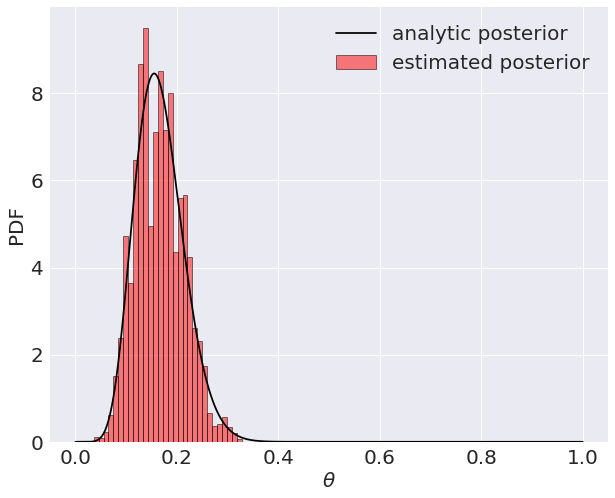

In [6]:
fig = plt.figure(figsize=(10,8))
plt.hist(posterior[500:], 30, density = 1, edgecolor='black', color = 'r', linewidth=1, label='estimated posterior', 
         alpha = 0.5)
plt.plot(theta, beta(a + int(pr*n), b + n - int(pr*n)).pdf(theta), color = 'k', label='analytic posterior')
plt.legend(fontsize = 20)
plt.xlabel(r'$\theta$', fontsize=20)
plt.ylabel('PDF', fontsize=20)
xticks = plt.xticks(size=20)
yticks = plt.yticks(size=20)

**Note on proposal width**: In general you don't want the width of the jumping distribution $g$ to be too narrow because your sampling will be inefficient as it takes a long time to explore the whole parameter space. But you also don't want it to be so large that you never accept a jump. Note, however, that we are still sampling from our target posterior distribution even with suboptimal proposal width, just less efficiently.

Another point, the key is that we want our samples to be independent of each other which cleary isn't the case here. Thus, one common metric to evaluate the efficiency of our sampler is the autocorrelation -- i.e. how correlated a sample $i$ is to sample $i-1$, $i-2$, etc. With just right width of jumping distribution, the autocorrelation can fall off rapidly. We preferably want to have a way of figuring out the right step width automatically. One common method is to keep adjusting the proposal width so that roughly 50% proposals are rejected.

## PyMC3 module
You can easily imagine that we can extend this to more complex models, estimate multiple parameters, etc. A useful library for Bayesian inference in Python is [PyMC3.](https://docs.pymc.io/)

Multiprocess sampling (4 chains in 4 jobs)
Metropolis: [th_logodds__]
100%|██████████| 20500/20500 [00:03<00:00, 6369.90it/s]
The number of effective samples is smaller than 25% for some parameters.


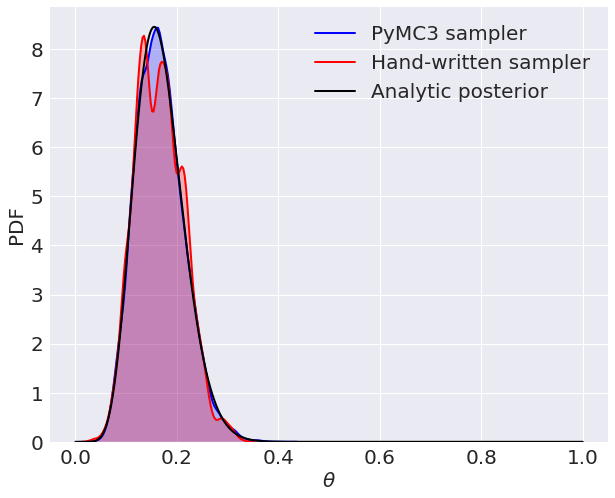

In [8]:
import pymc3 as pm

obs = [0]*(n-y) + [1]*y

with pm.Model():
    th = pm.Beta('th', a, b)
    returns = pm.Bernoulli('returns', th, observed = obs)
    
    step = pm.Metropolis()
    trace = pm.sample(20000, step)
    

fig = plt.figure(figsize=(10,8))
sns.kdeplot(trace[2000:]['th'], color = 'blue', shade=True, linewidth=2, label='PyMC3 sampler');
sns.kdeplot(posterior[500:], color = 'red', shade=True, linewidth=2, label='Hand-written sampler');
plt.plot(theta, beta(a + y, b + n - y).pdf(theta), c = 'black', linewidth=2, label='Analytic posterior')
plt.legend(fontsize = 20)
plt.xlabel(r'$\theta$', fontsize=20)
plt.ylabel('PDF', fontsize=20)
xticks = plt.xticks(size=20)
yticks = plt.yticks(size=20)

# Bayesian Inference and Hypothesis Testing

The use of Bayes factors is a Bayesian alternative to classical hypothesis testing. Using Bayesian inference we can obtain the posterior probability for a hypothesis (model):

$$\begin{align}
P(H_0\mid y) & = \frac{ P( y\mid H_0) P(H_0)}{ P(y) } \\
& = \frac{ P( y\mid H_0) P(H_0)}{ \sum_{k=1}P(y\mid H_k) P(H_k) } \\
& \propto P( y\mid H_0) P(H_0)
\end{align}
$$

where $P(y\mid H_0)$ is the likelihood under $H_0$ and $P(H_0)$ is the prior hypothesis probability.

Then comparing posteriors for two hypothesis yields:

$$
\underbrace{\frac{P(H_0\mid y)}{P(H_1\mid y)}}_\text{posterior odds} = \underbrace{ \frac{P(y\mid H_0)}{P(y\mid H_1)}}_{\text{Bayes factor } B_{01}}  \times \underbrace{ \frac{P(H_0)}{P(H_1)}}_\text{prior odds} 
$$

The **Bayes factor $B_{01}$** is a ratio of the likelihood probability of two competing hypotheses

$$\begin{align}
B_{01} &= \frac{P(y\mid H_0)}{P(y\mid H_1)} = \frac{\int P(y\mid \theta) P(\theta \mid H_0) {\rm{d}}\theta}{\int P(y\mid \theta) P(\theta \mid H_1) {\rm{d}}\theta}
\end{align}
$$

and is often thought of as the odds of $H_0$ to $H_1$ provided by the data. A value of $B_{01}$ > 1 means that $H_0$ is more strongly supported by the data under consideration than $H_1$.

## Unfair coin example 

Let's return to our example where we flipped the coin $n$ times and got $y$ heads. We will perform hypothesis testing using Bayesian approach and frequentist hypothesis testing.

**1) Bayesian approach**: 

We established that the likelihood in the case of a coin toss is a binomial distribution:

$$P(y\mid \theta) = \frac{n!}{(n - y)! y!}\theta^{y}(1 -\theta)^{n-y}.$$

Null hypothesis $H_0$ is that the coin is fair, thus $\theta = 0.5$ and $P(\theta\mid H_0)$ is a  Dirac delta function at $\theta = 0.5$. Thus

$$\begin{align}
P(y\mid H_0) &= \int P(y\mid \theta) P(\theta \mid H_0) {\rm{d}}\theta = P(y\mid \theta = 0.5)\\
& = \frac{n!}{(n-y)! y!}0.5^{y}0.5^{n-y}
\end{align}
$$

Alternative hypothesis $H_1$ is that the coin is unfair, so we can for example take the $P(\theta\mid H_1)$ distribution for $\theta$ that is uniform on [0,1]. In this case

$$\begin{align}
P(y\mid H_1) &= \int_0^1 \frac{n!}{(n-y)!y!}\theta^{y}(1-\theta)^{n-y} {\rm{d}}\theta \\
& = \frac{n!}{(n-y)!y!}\frac{y! (n-y)!}{(n+1)!} = \frac{1}{n+1}
\end{align}
$$

Now we can compute the Bayes factor

$$\begin{align}
B_{01} &= \frac{P(y\mid H_0)}{P(y\mid H_1)}
\end{align}
$$


In [9]:
coin_p = 0.5
bayes_factor = binom.pmf(y, n, coin_p) * (n + 1)
print ('Given our example n and y, we obtain B_01 = {}'.format(bayes_factor))

Given our example n and y, we obtain B_01 = 9.597368233471244e-08


In [10]:
bayes_factor < 1

True

This suggests an unfair coin and that we shoud reject the null hypothesis. But keep in mind the assumptions we made about priors.

*Note:* we could potentially also answer the question 'what is the probability that this coin is fair?' by taking the posterior distribution $P(\theta\mid y)$ and computing the area under the curve for 0.45 < $\theta$ < 0.55 (if a fair coin is defined as one whose probability of coming down heads is somewhere between 45% and 55%).

**2) Frequentist hypothesis testing:** 

- Null hypothesis: $\theta = 0.5$, Alternative hypothesis: $\theta \neq 0.5$
- Choose siginificance level: $\alpha = 0.05$
- Formulate assumptions about the distribution of the statistic involved in the test: binomial distribution with $p = 0.5$
- Compute $p$-value:

In [11]:
n = 50
y = 5
alpha = 0.05
coin_p = 0.5
p_value = binom_test(y, n, p = coin_p)
print ('p_value = {}'.format(p_value))

p_value = 4.209852022540875e-09


In [12]:
p_value < alpha

True

# A note on assumptions

In the example above we concluded for both approaches that we should reject the null hypothesis. That is not always the case, the frequentist approach can lead to a different conclusion than the Bayesian. Keep in mind that the Bayes factor can be extremely sensitive to prior assumptions about parameters within each hypothesis. 

We make several assumptions in Bayesian inference:
- **prior distributions**: assumptions about a paramater value before we have seen any data, prior assumptions about parameters within hypotheses ... 
- **likelihood functions**: we construct a probabilistic model to get the probability of the data given parameter values. We make assumptions in order to use a particular model (binomial, poisson,...)
